In [1]:
import pandas as pd 
import numpy as np
import os      
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
path="C:/Users/Yusuke/Dropbox/Georgia_tech/GT_KIDS/Results/"
Folder_name="Processtime_dynamic_Inte_7_300s/"     # First of all, you need to select the folder name !!!!

In [2]:
def Get_Latency(df_algo_time):
    print(df_algo_time.describe())
    sns.set()
    df_algo_time.hist()
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency")
    return df_algo_time.mean()
    
def Get_aggregation(KID1_table, KID3_table, KID7_table, KID9_table, KID11_table,):
    aggre=pd.concat([KID1_table, KID3_table, KID7_table, KID9_table, KID11_table])
    aggre=aggre.sort_index()
    print(aggre.describe())
    aggre.hist()
    return aggre
    
def Get_DetailsOfKID(KID_table):
    sns.set()
    KID_table.plot()
    KID_table.hist()
    print(KID_table.describe())
    
def Get_Elapsed_time(KID_table):
    elapsed_time=[]
    for i in range(len(KID_table)):
        time=KID_table.index[i]-KID_table.index[0]
        elapsed_time.append(time)
    return elapsed_time

def __datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')

def EpTget(KID_table_datetime):
    
    ElapsedTime=[]
    for i in range(len(KID_table_datetime.index)):
        tmp=__datetime(KID_table_datetime.index[i]) - __datetime(KID_table_datetime.index[0])
        ElapsedTime.append(tmp.total_seconds())
    return ElapsedTime

def Get_allKID(Ipt_Kid1, Ipt_Kid3, Ipt_Kid7, Ipt_Kid9, Ipt_Kid11, column_name):
    a=Ipt_Kid1[column_name]
    a.name=column_name+'_KID1'
    b=Ipt_Kid3[column_name]
    b.name=column_name+'_KID3'
    c=Ipt_Kid7[column_name]
    c.name=column_name+'_KID7'
    d=Ipt_Kid9[column_name]
    d.name=column_name+'_KID9'
    e=Ipt_Kid11[column_name]
    e.name=column_name+'_KID11'
    imash=pd.concat([a,b,c,d,e], axis=1).sort_index()
    imash_itp=imash.interpolate()
    return imash_itp

def MakeElapsedTable(Table):
    ELT=pd.concat([Table.reset_index(), pd.DataFrame(EpTget(Table), columns=['Elapsed time (s)'])], axis=1)
    ELT=ELT.set_index('Elapsed time (s)')
    return ELT

# Reading Data

In [3]:
KID1_table_RR=pd.read_pickle(path+Folder_name+"KID1_RR.pkl")
KID3_table_RR=pd.read_pickle(path+Folder_name+"KID3_RR.pkl")
KID7_table_RR=pd.read_pickle(path+Folder_name+"KID7_RR.pkl")
KID9_table_RR=pd.read_pickle(path+Folder_name+"KID9_RR.pkl")
KID11_table_RR=pd.read_pickle(path+Folder_name+"KID11_RR.pkl")
df_algo_time_RR=pd.read_pickle(path+Folder_name+"df_algo_time_RR.pkl")
KID1_serve_time_RR=pd.read_pickle(path+Folder_name+"KID1_serve_time_RR.pkl")
KID3_serve_time_RR=pd.read_pickle(path+Folder_name+"KID3_serve_time_RR.pkl")
KID7_serve_time_RR=pd.read_pickle(path+Folder_name+"KID7_serve_time_RR.pkl")
KID9_serve_time_RR=pd.read_pickle(path+Folder_name+"KID9_serve_time_RR.pkl")
KID11_serve_time_RR=pd.read_pickle(path+Folder_name+"KID11_serve_time_RR.pkl")

KID1_table_CPUbased=pd.read_pickle(path+Folder_name+"KID1_CPUbased.pkl")
KID3_table_CPUbased=pd.read_pickle(path+Folder_name+"KID3_CPUbased.pkl")
KID7_table_CPUbased=pd.read_pickle(path+Folder_name+"KID7_CPUbased.pkl")
KID9_table_CPUbased=pd.read_pickle(path+Folder_name+"KID9_CPUbased.pkl")
KID11_table_CPUbased=pd.read_pickle(path+Folder_name+"KID11_CPUbased.pkl")
df_algo_time_CPUbased=pd.read_pickle(path+Folder_name+"df_algo_time_CPUbased.pkl")
KID1_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_CPUbased.pkl")
KID3_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_CPUbased.pkl")
KID7_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_CPUbased.pkl")
KID9_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_CPUbased.pkl")
KID11_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_CPUbased.pkl")

KID1_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_Thermalbased.pkl")
KID3_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_Thermalbased.pkl")
KID7_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_Thermalbased.pkl")
KID9_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_Thermalbased.pkl")
KID11_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_Thermalbased.pkl")
df_algo_time_Thermalbased=pd.read_pickle(path+Folder_name+"df_algo_time_Thermalbased.pkl")
KID1_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_Thermalbased.pkl")
KID3_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_Thermalbased.pkl")
KID7_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_Thermalbased.pkl")
KID9_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_Thermalbased.pkl")
KID11_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_Thermalbased.pkl")

# Each KID servers detail 

          FAN (%)          PS  CPU_utilization  CPU_temperature(degC)
count  947.000000  941.000000       946.000000             949.000000
mean    29.073970   15.906536         4.317532              59.978091
std      8.411439   22.211523         3.212333               4.097856
min     21.950000    0.200000         0.090000              53.333333
25%     23.910000    4.100000         2.150000              56.145833
50%     27.830000    7.750000         3.350000              60.083333
75%     28.620000   15.000000         5.507500              62.395833
max     62.720000  100.000000        12.350000              72.416667


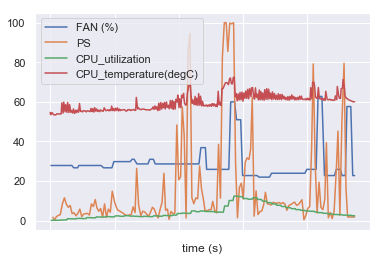

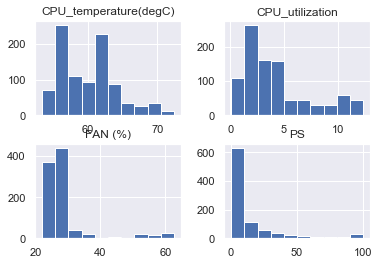

In [4]:
Get_DetailsOfKID(KID1_table_CPUbased)

# Resampling

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



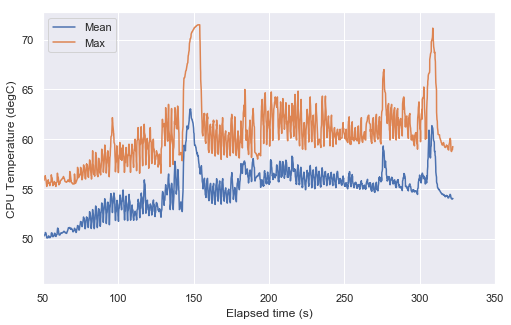

In [5]:
sns.set()
RR=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Mean")
RR.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.xlim(50, 350)
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



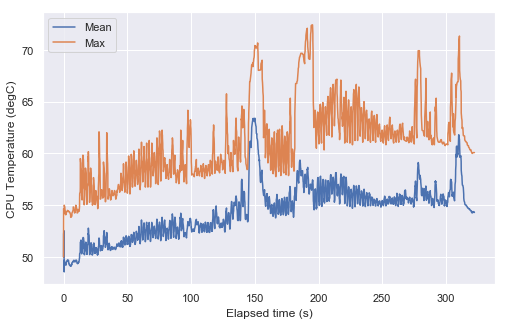

In [6]:
CPU_based=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
CPU_based.mean(axis=1).plot(label="Mean")
CPU_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



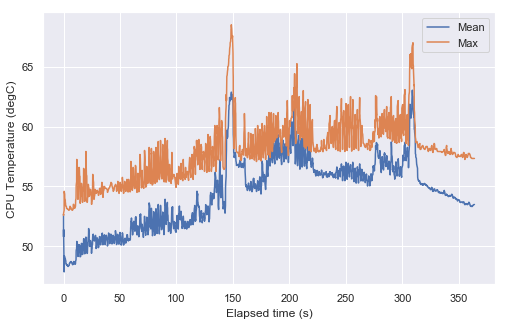

In [7]:
Thermal_based=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
Thermal_based.mean(axis=1).plot(label="Mean")
Thermal_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

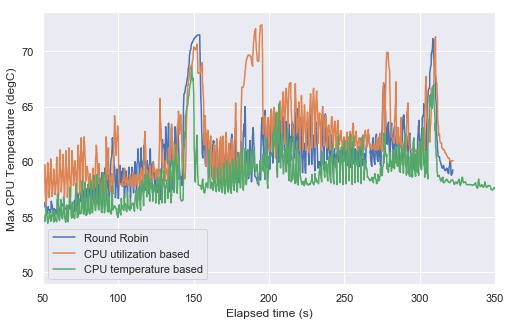

In [8]:
plt.figure(figsize=(8.1, 5))
RR.max(axis=1).plot(label="Round Robin")
CPU_based.max(axis=1).plot(label="CPU utilization based")
Thermal_based.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max CPU Temperature (degC)")
plt.xlim(50, 350)
plt.legend()

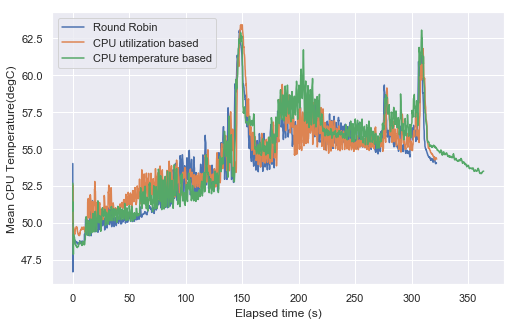

In [9]:
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Round Robin")
CPU_based.mean(axis=1).plot(label="CPU utilization based")
Thermal_based.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean CPU Temperature(degC)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



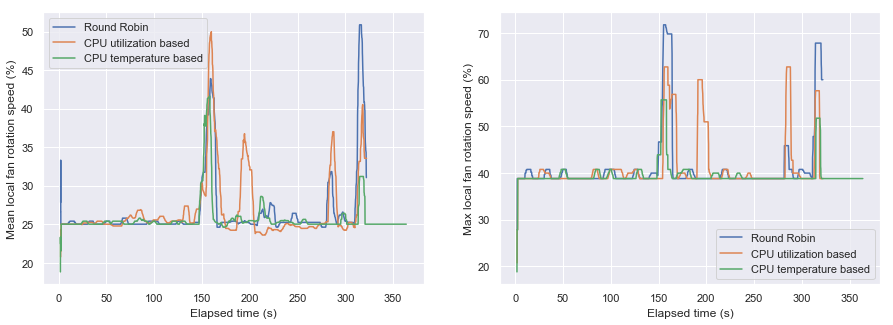

In [10]:
RR_fan=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'FAN (%)'))
CPU_based_fan=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'FAN (%)'))
Thermal_based_fan=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'FAN (%)'))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
RR_fan.mean(axis=1).plot(label="Round Robin")
CPU_based_fan.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean local fan rotation speed (%)")
plt.legend()

plt.subplot(1, 2, 2)
RR_fan.max(axis=1).plot(label="Round Robin")
CPU_based_fan.max(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max local fan rotation speed (%)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



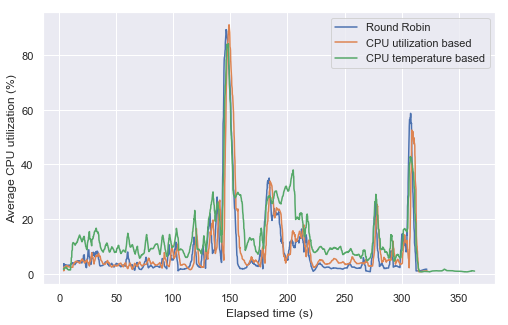

In [11]:
RR_ps=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'PS'))
CPU_based_ps=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'PS'))
Thermal_based_ps=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'PS'))

plt.figure(figsize=(8.1, 5))
RR_ps.mean(axis=1).plot(label="Round Robin")
CPU_based_ps.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_ps.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Average CPU utilization (%)")
plt.legend()

# Round Robin Histgram

       Latency (s)
count   299.000000
mean      1.001455
std       0.000507
min       1.000491
25%       1.001217
50%       1.001243
75%       1.001464
max       1.004774


Latency (s)    1.001455
dtype: float64

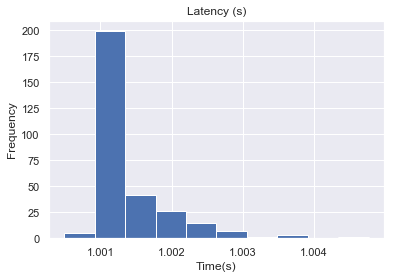

In [12]:
Get_Latency(df_algo_time_RR)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4754.000000  4731.000000      4757.000000            4769.000000
mean     26.613207     8.488184         2.830222              54.070315
std       9.595160    16.853342         2.377968               7.101441
min      18.820000     0.100000         0.050000              36.083333
25%      18.820000     1.800000         0.690000              51.833333
50%      21.950000     2.950000         2.220000              55.750000
75%      29.362563     6.200000         4.450000              58.937500
max      71.740000   100.000000        11.220000              71.500000


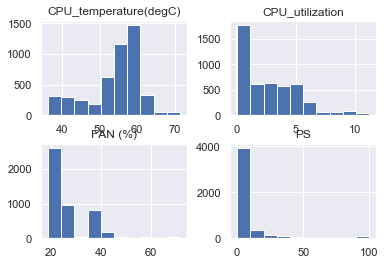

In [13]:
RR_hist=Get_aggregation(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR)

# CPU utilization based 

       Latency (s)
count   299.000000
mean      1.001791
std       0.000673
min       1.000558
25%       1.001419
50%       1.001480
75%       1.001923
max       1.005806


Latency (s)    1.001791
dtype: float64

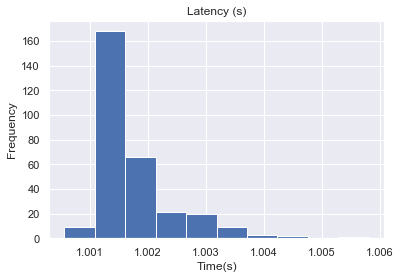

In [14]:
Get_Latency(df_algo_time_CPUbased)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4735.000000  4705.000000      4730.000000            4745.000000
mean     26.753207     8.947194         2.842885              54.444152
std       9.455420    16.800758         2.464092               7.640967
min      18.820000     0.100000         0.020000              36.166667
25%      18.820000     1.866667         0.970000              51.604167
50%      21.950000     3.166667         2.190000              56.291667
75%      35.670000     7.900000         4.090000              59.083333
max      62.720000   100.000000        12.350000              72.416667


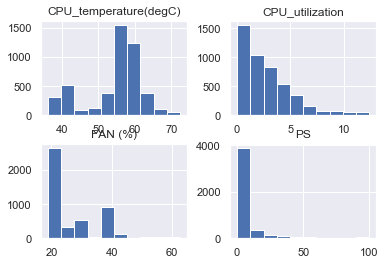

In [15]:
CPU_based_hist=Get_aggregation(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased)

# Thermal based 

       Latency (s)
count   299.000000
mean      1.001891
std       0.000724
min       1.000828
25%       1.001450
50%       1.001522
75%       1.002152
max       1.006179


Latency (s)    1.001891
dtype: float64

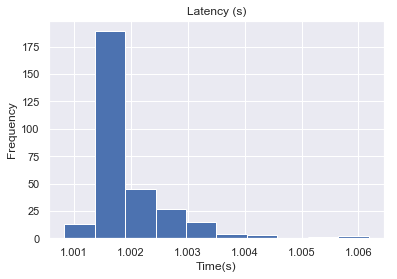

In [16]:
Get_Latency(df_algo_time_Thermalbased)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  5369.000000  5339.000000      5364.000000            5379.000000
mean     25.710619    12.923160         3.467935              54.512595
std       8.125016    17.705175         5.060834               5.319109
min      18.820000     0.000000         0.000000              36.083333
25%      18.820000     4.400000         0.920000              53.062500
50%      20.780000     8.500000         1.810000              55.833333
75%      27.830000    13.300000         3.552500              57.833333
max      55.660000   100.000000        28.630000              68.500000


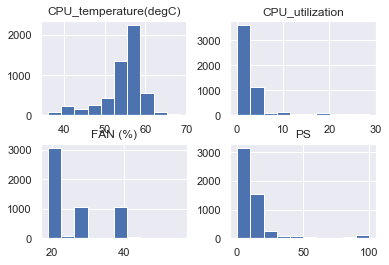

In [17]:
Thermal_based_hist=Get_aggregation(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased)

In [18]:
print(RR_hist.describe(), "\n", CPU_based_hist.describe(),"\n", Thermal_based_hist.describe())

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4754.000000  4731.000000      4757.000000            4769.000000
mean     26.613207     8.488184         2.830222              54.070315
std       9.595160    16.853342         2.377968               7.101441
min      18.820000     0.100000         0.050000              36.083333
25%      18.820000     1.800000         0.690000              51.833333
50%      21.950000     2.950000         2.220000              55.750000
75%      29.362563     6.200000         4.450000              58.937500
max      71.740000   100.000000        11.220000              71.500000 
            FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4735.000000  4705.000000      4730.000000            4745.000000
mean     26.753207     8.947194         2.842885              54.444152
std       9.455420    16.800758         2.464092               7.640967
min      18.820000     0.100000         0.020000              

In [19]:
table_mean=pd.DataFrame({'Round Robin':RR_hist.mean(), 
               'CPU utilization based':CPU_based_hist.mean(), 
              'CPU temperature based':Thermal_based_hist.mean()})
table_mean.rename(index={'FAN (%)':'Average local fan rotation speed (%)', 'PS':'Average CPU utilization (%)', 
                         'CPU_utilization':'Average system load', 'CPU_temperature(degC)':'Average CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Average local fan rotation speed (%),26.613207,26.753207,25.710619
Average CPU utilization (%),8.488184,8.947194,12.923160
Average system load,2.830222,2.842885,3.467935
Average CPU temperature (degC),54.070315,54.444152,54.512595


In [20]:
table_std=pd.DataFrame({'Round Robin':RR_hist.std(), 
               'CPU utilization based':CPU_based_hist.std(), 
              'CPU temperature based':Thermal_based_hist.std()})
table_std.rename(index={'FAN (%)':'Standard deviation of local fan rotation speed (%)', 'PS':'Standard deviation of average CPU utilization (%)', 
                         'CPU_utilization':'Standard deviation of average system load', 'CPU_temperature(degC)':'Standard deviation of average CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Standard deviation of local fan rotation speed (%),9.595160,9.455420,8.125016
Standard deviation of average CPU utilization (%),16.853342,16.800758,17.705175
Standard deviation of average system load,2.377968,2.464092,5.060834
Standard deviation of average CPU temperature (degC),7.101441,7.640967,5.319109


In [21]:
table_max=pd.DataFrame({'Round Robin':RR_hist.max(), 
               'CPU utilization based':CPU_based_hist.max(), 
              'CPU temperature based':Thermal_based_hist.max()})
table_max.rename(index={'FAN (%)':'Max local fan rotation speed (%)', 'PS':'Max CPU utilization (%)', 
                         'CPU_utilization':'Max system load', 'CPU_temperature(degC)':'Max CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Max local fan rotation speed (%),71.74,62.720000,55.66
Max CPU utilization (%),100.00,100.000000,100.00
Max system load,11.22,12.350000,28.63
Max CPU temperature (degC),71.50,72.416667,68.50


# Histgram evaluation

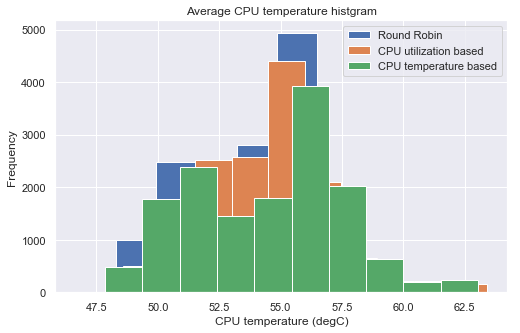

In [22]:
# For mean
hoge=pd.concat([RR.mean(axis=1), CPU_based.mean(axis=1), Thermal_based.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
# Golden ration 1:1.618
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

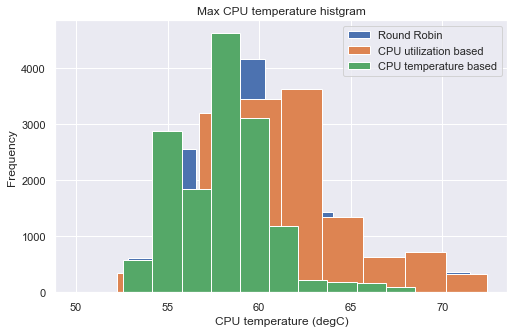

In [23]:
# For max
hoge=pd.concat([RR.max(axis=1), CPU_based.max(axis=1), Thermal_based.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Max CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

In [24]:
print(len(RR_hist), len(CPU_based_hist), len(Thermal_based_hist))

4769 4745 5379


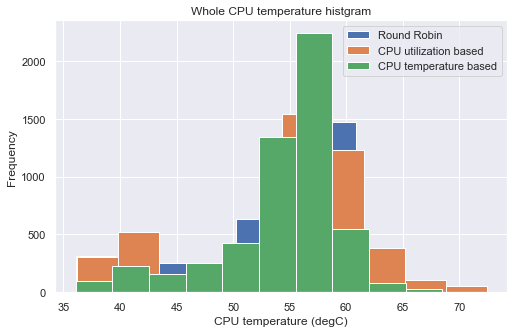

In [25]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['CPU_temperature(degC)'].hist(label="Round Robin")
CPU_based_hist['CPU_temperature(degC)'].hist(label="CPU utilization based")
Thermal_based_hist['CPU_temperature(degC)'].hist(label="CPU temperature based")
plt.title("Whole CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

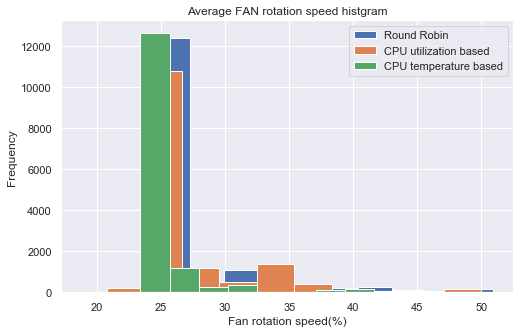

In [26]:
# For mean
hoge=pd.concat([RR_fan.mean(axis=1), CPU_based_fan.mean(axis=1), Thermal_based_fan.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average FAN rotation speed histgram")
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

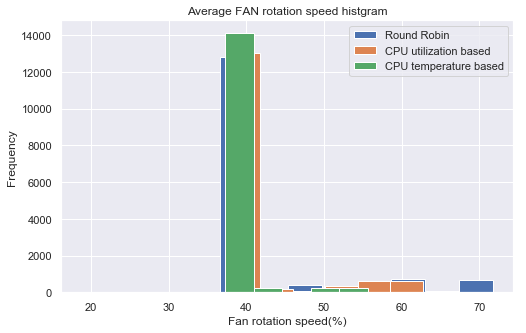

In [27]:
# For max
hoge=pd.concat([RR_fan.max(axis=1), CPU_based_fan.max(axis=1), Thermal_based_fan.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average FAN rotation speed histgram")
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

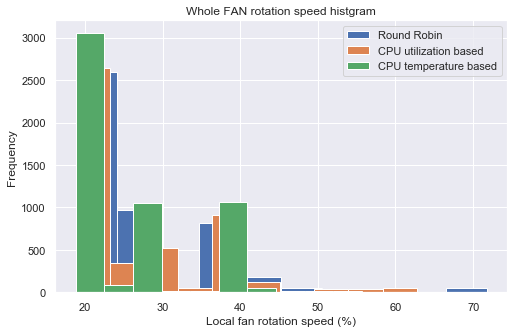

In [28]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['FAN (%)'].hist(label="Round Robin")
CPU_based_hist['FAN (%)'].hist(label="CPU utilization based")
Thermal_based_hist['FAN (%)'].hist(label="CPU temperature based")
plt.title("Whole FAN rotation speed histgram")
plt.xlabel("Local fan rotation speed (%)")
plt.ylabel("Frequency")
plt.legend()

# Server Process time evaluation

       Server Processing time (s)
count                  750.000000
mean                     0.465656
std                      0.711449
min                      0.000020
25%                      0.265773
50%                      0.332806
75%                      0.416661
max                     10.842591


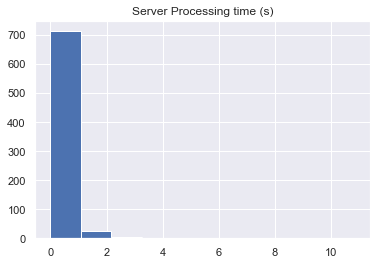

In [29]:
RR_servetime=Get_aggregation(KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR).mean()

       Server Processing time (s)
count                  750.000000
mean                     0.476644
std                      0.701423
min                      0.000022
25%                      0.270355
50%                      0.338618
75%                      0.434859
max                     10.321215


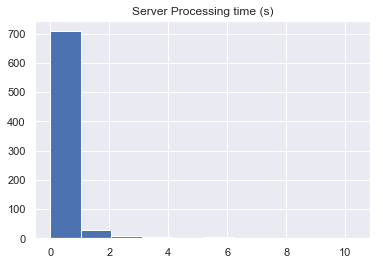

In [30]:
CPUbaseds_servetime=Get_aggregation(KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased).mean()

       Server Processing time (s)
count                  750.000000
mean                     0.531436
std                      1.059530
min                      0.000017
25%                      0.260879
50%                      0.328689
75%                      0.436907
max                     14.895561


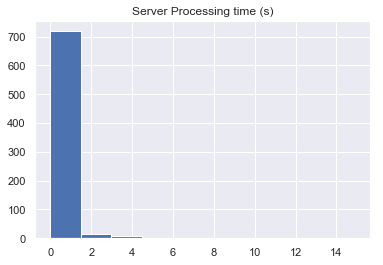

In [31]:
Thermalbased_servetime=Get_aggregation(KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased).mean()

In [32]:
(RR_servetime+CPUbaseds_servetime+Thermalbased_servetime)/3

Server Processing time (s)    0.491245
dtype: float64

In [33]:
df_servetime=pd.DataFrame({'Round Robin':
                 pd.concat([KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR]).mean(),
                 'CPU Utilization based':
                 pd.concat([KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased]).mean(),
                 'CPU temperature based':
                 pd.concat([KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased]).mean()
                })

df_algotime=pd.DataFrame({'Round Robin':
                 df_algo_time_RR.mean()-1,
                 'CPU Utilization based':
                 df_algo_time_CPUbased.mean()-1,
                 'CPU temperature based':
                 df_algo_time_Thermalbased.mean()-1
                })
table_time=pd.concat([df_algotime, df_servetime])
#table_time.index.names=['Average algorithm latency time (s)', 'Average server processing time (s)']
table_time.rename(index={'Latency (s)':'Average queueing latency time (s)', 'Server Processing time (s)':'Average server processing time (s)'})

,Round Robin,CPU Utilization based,CPU temperature based
Average queueing latency time (s),0.001455,0.001791,0.001891
Average server processing time (s),0.465656,0.476644,0.531436
